In [ ]:
# MODULE IMPORTS
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#IMPORT ALL METHODS FOR PROBE
from methods.device_methods import *
from pathfinder import path_finder

In [69]:
# INITIALIZE DEVICE NAME
DEVICE_NAME = "CAM3"

In [70]:
# SELECT SHOTS FOR ANALYSIS
shot_nos = [1, 2, 3] #user-specified

# Create dictionary of shot paths
shot_path_dict = {}
for shot_no in shot_nos:
    #For each shot number, use the PATHFINDER function to return path to shot data
    shot_path_dict[shot_no] = path_finder(DEVICE_NAME, shot_no)

# HARDCODED- TO BE REMOVED
shot_path_dict = {
    1:"../example_data/data/HRM3.DigiCam_OD0_1714383312791697_1714383306135000.csv", 
    2:"../example_data/data/HRM3.DigiCam_OD0_1714383312791697_1714383306135000.csv",
    3:"../example_data/data/BG_HRM3.DigiCam_OD0_1714407435191489_1714407428535000.csv",
}

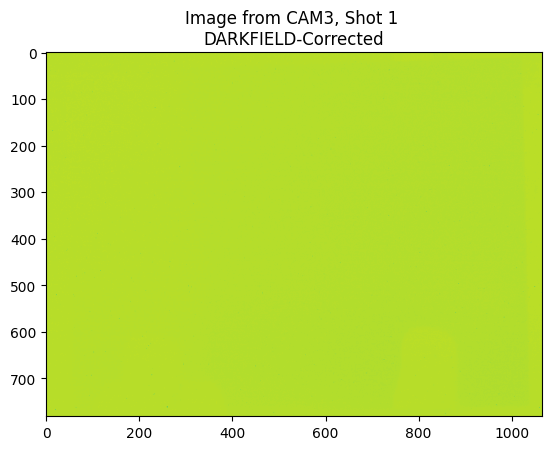

In [ ]:
##########################################
# PLOT RAW OR BACKGROUND-CORRECTED IMAGE #
##########################################

#user input- which shot is the raw shot?
raw_shot_no = 1

#background removal information- which shot is the background, do we want to remove it?
bkg_shot_no = 3
bkg_name = "DARKFIELD"
bkg_removal = True

#READ RAW AND BACKGROUND IMAGE DATA
raw_image = load_digicam_image(path=shot_path_dict[raw_shot_no])
bkg_image = load_digicam_image(path=shot_path_dict[bkg_shot_no])

if bkg_removal:
    img = bkg_subtraction(raw_arr=raw_image, bkg_arr=bkg_image)
    plt.title(f"Image from {DEVICE_NAME}, Shot {raw_shot_no} \n{bkg_name}-Corrected")
else:
    img = raw_image
    plt.title(f"Raw Image from {DEVICE_NAME}, Shot {raw_shot_no}")

plt.imshow(img)
plt.show()

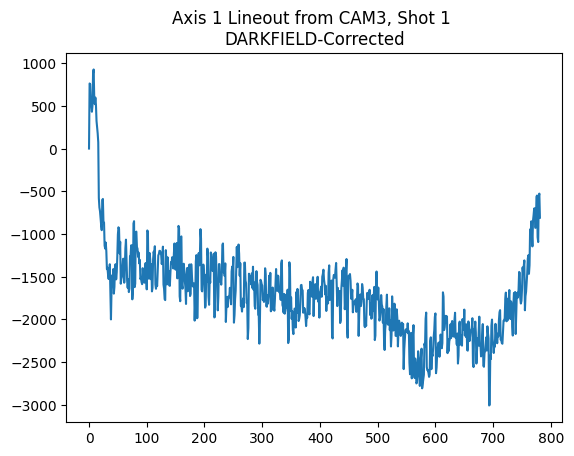

In [ ]:
########################
# LINEOUTS CALCULATION #
########################

##########################################
# PLOT RAW OR BACKGROUND-CORRECTED IMAGE #
##########################################

#user input- which shot is the raw shot?
raw_shot_no = 1
axis = 1 #which axis do we want to perform lineouts over?

#background removal information- which shot is the background, do we want to remove it?
bkg_shot_no = 3
bkg_name = "DARKFIELD"
bkg_removal = True

#READ RAW AND BACKGROUND IMAGE DATA
raw_image = load_digicam_image(shot_path_dict[raw_shot_no])
bkg_image = load_digicam_image(shot_path_dict[bkg_shot_no])

#CREATE LINEOUTS, AND APPROPRIATE X-AXIS
raw_lineout, pixels_1D = lineout(raw_image, axis=axis)
bkg_lineout, pixels_1D = lineout(bkg_image, axis=axis)

if bkg_removal:
    lineout = bkg_subtraction(raw_lineout, bkg_lineout)
    plt.title(f"Axis {axis} Lineout from {DEVICE_NAME}, Shot {raw_shot_no} \n{bkg_name}-Corrected")
else:
    lineout = raw_lineout
    plt.title(f"Axis {axis} Lineout from {DEVICE_NAME}, Shot {raw_shot_no}")

plt.plot(pixels_1D, lineout)
plt.show()

In [73]:
######################################
# FIT GAUSSIAN TO THE CHROMOX SCREEN #
######################################

def Gaussian_plus_flat_background(x,peak,mu,sigma, offset):
    return peak*np.exp(-(x-mu)**2/(2*sigma**2)) + offset

def fit_Gaussian_plus_flat_background(lineout_ls, lineout_vals):
    """
    takes x_vals of the lineout (probably an np.linsapce), and the lineout values
    """

    # dont have a good way of estimating the standard deviation in the inital guess
    # initial guess = [peak, mu, sigma, offset in y]
    initial_guess = [np.max(lineout_vals), np.argmax(lineout_vals), 20, np.mean(lineout_vals)]
    cfit = curve_fit(Gaussian_plus_flat_background, lineout_ls, lineout_vals, p0 = initial_guess)
    return cfit[0]

x_cfit = fit_Gaussian_plus_flat_background(lineout_ls=pixels_1D, lineout_vals=lineout)
x_cfit




RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.